In [170]:
import pandas as pd
import requests
import matplotlib.pyplot as plt
import requests
import os
import numpy as np

pd.options.mode.chained_assignment = None
pd.set_option('display.max_rows', 200)

## Load Statistics

In [171]:
standings_df = pd.read_csv('data/outputs/standings.csv')
standings_df.head()

,position,playedGames,form,won,draw,lost,points,goalsFor,goalsAgainst,goalDifference,team_short_name,team_group,competition
0,1,29,NaN,24,2,3,74,66,21,45,Napoli,0,Serie A
1,2,29,NaN,17,7,5,58,46,20,26,Lazio,0,Serie A
2,3,29,NaN,16,5,8,53,39,26,13,Roma,0,Serie A
3,4,29,NaN,15,7,7,52,48,36,12,Milan,0,Serie A
4,5,29,NaN,16,3,10,51,48,33,15,Inter,0,Serie A


In [172]:
matches_df = pd.read_csv('data/outputs/matches.csv')
matches_df.head()

,main_team,opponent_team,goal_fatti,no_goal,goal,tot_goals,goal_subiti,away_home,result,team_has_scored,...,form,won,draw,lost,points,goalsFor,goalsAgainst,goalDifference,team_short_name,team_group
0,Milan,Udinese,4,False,True,6,2,home,Win,True,...,NaN,9,12,8,39,39,36,3,Udinese,1
1,Sampdoria,Atalanta,0,True,False,2,2,home,Loss,False,...,NaN,14,6,9,48,47,34,13,Atalanta,0
2,Lecce,Inter,1,False,True,3,2,home,Loss,True,...,NaN,16,3,10,51,48,33,15,Inter,0
3,Monza,Torino,1,False,True,3,2,home,Loss,True,...,NaN,10,8,11,38,30,35,-5,Torino,1
4,Fiorentina,Cremonese,3,False,True,5,2,home,Win,True,...,NaN,2,10,17,16,26,54,-28,Cremonese,2


In [173]:
win_draw_loss = pd.read_csv('data/outputs/win_draw_loss.csv')
win_draw_loss.head()

,main_team,team_group,competition,n_matches,avg_win,avg_draw,avg_loss,win_streak_weighted,draw_streak_weighted,loss_streak_weighted,tot_giornata,win_streak_weighted_ratio,draw_streak_weighted_ratio,loss_streak_weighted_ratio
0,Almeria,0,La Liga,10,0.100000,0.100000,0.800000,24.0,17.0,104.0,145.0,0.165517,0.117241,0.717241
1,Almeria,1,La Liga,12,0.333333,0.250000,0.416667,33.0,70.0,81.0,184.0,0.179348,0.380435,0.440217
2,Almeria,2,La Liga,6,0.500000,0.333333,0.166667,62.0,20.0,4.0,86.0,0.720930,0.232558,0.046512
3,Almeria,all,La Liga,28,0.285714,0.214286,0.500000,119.0,107.0,189.0,415.0,0.286747,0.257831,0.455422
4,Arsenal,0,Premier League,9,0.666667,0.111111,0.222222,97.0,19.0,18.0,134.0,0.723881,0.141791,0.134328


In [174]:
win_draw_loss_away_home = pd.read_csv('data/outputs/win_draw_loss_away_home.csv')
win_draw_loss_away_home.head()

,main_team,team_group,competition,away_home,n_matches,avg_win,avg_draw,avg_loss,win_streak_weighted,draw_streak_weighted,loss_streak_weighted,tot_giornata,win_streak_weighted_ratio,draw_streak_weighted_ratio,loss_streak_weighted_ratio
0,Almeria,0,La Liga,away,4,0.000000,0.000000,1.000000,0.0,0.0,40.0,40.0,0.000000,0.000000,1.000000
1,Almeria,0,La Liga,home,6,0.166667,0.166667,0.666667,24.0,17.0,64.0,105.0,0.228571,0.161905,0.609524
2,Almeria,1,La Liga,away,6,0.000000,0.333333,0.666667,0.0,43.0,76.0,119.0,0.000000,0.361345,0.638655
3,Almeria,1,La Liga,home,6,0.666667,0.166667,0.166667,33.0,27.0,5.0,65.0,0.507692,0.415385,0.076923
4,Almeria,2,La Liga,away,3,0.000000,0.666667,0.333333,0.0,20.0,4.0,24.0,0.000000,0.833333,0.166667


In [175]:
scored_conceded_goal_group = pd.read_csv('data/outputs/team_scored_conceded_goal_group.csv')
scored_conceded_goal_group.head()

,main_team,team_group,competition,n_matches,team_has_scored,team_has_conceded_goal,team_has_scored_streak_weighted,team_has_conceded_goal_streak_weighted,tot_giornata,team_has_scored_streak_weighted_ratio,team_has_conceded_goal_streak_weighted_ratio,team_has_conceded_goal_ratio,team_has_scored_ratio
0,Almeria,0,La Liga,10,6,9,84.0,121.0,145.0,0.579310,0.834483,0.900000,0.600000
1,Almeria,1,La Liga,12,9,12,152.0,184.0,184.0,0.826087,1.000000,1.000000,0.750000
2,Almeria,2,La Liga,6,5,5,82.0,72.0,86.0,0.953488,0.837209,0.833333,0.833333
3,Almeria,all,La Liga,28,20,26,318.0,377.0,415.0,0.766265,0.908434,0.928571,0.714286
4,Arsenal,0,Premier League,9,8,7,115.0,95.0,134.0,0.858209,0.708955,0.777778,0.888889


In [176]:
no_goal_group = pd.read_csv('data/outputs/no_goal_group.csv')
no_goal_group.head()

,main_team,team_group,competition,n_matches,no_goal,no_goal_streak_weighted,goal_streak_weighted,tot_giornata,no_goal_streak_weighted_ratio,goal_streak_weighted_ratio,no_goal_ratio,goal_ratio
0,Almeria,0,La Liga,10,5,85.0,60.0,145.0,0.586207,0.413793,0.500000,0.500000
1,Almeria,1,La Liga,12,3,32.0,152.0,184.0,0.173913,0.826087,0.250000,0.750000
2,Almeria,2,La Liga,6,2,18.0,68.0,86.0,0.209302,0.790698,0.333333,0.666667
3,Almeria,all,La Liga,28,10,135.0,280.0,415.0,0.325301,0.674699,0.357143,0.642857
4,Arsenal,0,Premier League,9,2,39.0,95.0,134.0,0.291045,0.708955,0.222222,0.777778


In [177]:
no_goal_group_away_home = pd.read_csv('data/outputs/no_goal_group_away_home.csv')
no_goal_group_away_home.head()

,main_team,team_group,away_home,competition,n_matches,no_goal,goal_streak_weighted,no_goal_streak_weighted,tot_giornata,goal_streak_weighted_ratio,no_goal_streak_weighted_ratio,no_goal_ratio,goal_ratio
0,Almeria,0,away,La Liga,4,2,20.0,20.0,40.0,0.500000,0.500000,0.500000,0.500000
1,Almeria,0,home,La Liga,6,3,40.0,65.0,105.0,0.380952,0.619048,0.500000,0.500000
2,Almeria,1,away,La Liga,6,2,92.0,27.0,119.0,0.773109,0.226891,0.333333,0.666667
3,Almeria,1,home,La Liga,6,1,60.0,5.0,65.0,0.923077,0.076923,0.166667,0.833333
4,Almeria,2,away,La Liga,3,1,20.0,4.0,24.0,0.833333,0.166667,0.333333,0.666667


In [178]:
n_goal_group = pd.read_csv('data/outputs/num_goals_group.csv')
n_goal_group.head()

,main_team,team_group,competition,n_matches,avg_goal_fatti,avg_goal_subiti
0,Almeria,0,La Liga,10,0.700000,2.100000
1,Almeria,1,La Liga,12,1.500000,1.750000
2,Almeria,2,La Liga,6,1.500000,1.000000
3,Almeria,all,La Liga,28,1.214286,1.714286
4,Arsenal,0,Premier League,9,2.222222,1.555556


## Exploration

#### Teams with highest delta average goals for-against

In [179]:
dd = n_goal_group[no_goal_group.team_group=='all']
dd['delta_goal'] = dd['avg_goal_fatti'] - dd['avg_goal_subiti']
dd.sort_values('delta_goal', ascending=False)\
    [['main_team','competition','n_matches','avg_goal_fatti','avg_goal_subiti','delta_goal']].head(10)

,main_team,competition,n_matches,avg_goal_fatti,avg_goal_subiti,delta_goal
35,Bayern Munich,Bundesliga,27,2.851852,1.074074,1.777778
183,Man City,Premier League,29,2.586207,0.931034,1.655172
31,Barcelona,La Liga,28,1.892857,0.321429,1.571429
199,Napoli,Serie A,29,2.275862,0.724138,1.551724
7,Arsenal,Premier League,30,2.400000,0.966667,1.433333
219,Real Madrid,La Liga,28,2.107143,0.857143,1.250000
203,Newcastle,Premier League,29,1.655172,0.724138,0.931034
147,Lazio,Serie A,29,1.586207,0.689655,0.896552
23,Ath Madrid,La Liga,28,1.607143,0.714286,0.892857
83,Dortmund,Bundesliga,27,2.185185,1.333333,0.851852


#### Teams with highest delta average goals for-against, with top tier teams in their championship

In [180]:
dd = n_goal_group[no_goal_group.team_group=='0']
dd['delta_goal'] = dd['avg_goal_fatti'] - dd['avg_goal_subiti']
dd.sort_values('delta_goal', ascending=False)\
    [['main_team','competition','n_matches','avg_goal_fatti','avg_goal_subiti','delta_goal']].head(10)

,main_team,competition,n_matches,avg_goal_fatti,avg_goal_subiti,delta_goal
32,Bayern Munich,Bundesliga,11,2.636364,0.909091,1.727273
28,Barcelona,La Liga,9,2.111111,0.666667,1.444444
180,Man City,Premier League,10,2.600000,1.500000,1.100000
4,Arsenal,Premier League,9,2.222222,1.555556,0.666667
200,Newcastle,Premier League,8,1.375000,0.750000,0.625000
144,Lazio,Serie A,10,1.500000,0.900000,0.600000
196,Napoli,Serie A,10,1.600000,1.100000,0.500000
164,Liverpool,Premier League,12,2.166667,1.666667,0.500000
80,Dortmund,Bundesliga,11,1.909091,1.454545,0.454545
188,Milan,Serie A,9,1.666667,1.333333,0.333333


#### Teams with highest NO GOAL percentage of matches

In [181]:
no_goal_group[no_goal_group.team_group=='all'].sort_values('no_goal_ratio', ascending=False)\
    [['main_team','competition','n_matches','no_goal','no_goal_ratio']].head(10)

,main_team,competition,n_matches,no_goal,no_goal_ratio
31,Barcelona,La Liga,28,22,0.785714
143,Juventus,Serie A,29,21,0.724138
147,Lazio,Serie A,29,19,0.655172
63,Cadiz,La Liga,28,18,0.642857
179,Mallorca,La Liga,28,18,0.642857
295,Villarreal,La Liga,28,18,0.642857
283,Valladolid,La Liga,28,18,0.642857
51,Bournemouth,Premier League,30,19,0.633333
303,West Ham,Premier League,29,18,0.620690
231,Sampdoria,Serie A,29,18,0.620690


#### Teams with highest percentage of GOAL matches

In [182]:
no_goal_group[no_goal_group.team_group=='all'].sort_values('goal_ratio', ascending=False)\
    [['main_team','competition','n_matches','no_goal','goal_ratio']].head(10)

,main_team,competition,n_matches,no_goal,goal_ratio
99,Espanol,La Liga,28,7,0.750000
127,Girona,La Liga,28,8,0.714286
87,Ein Frankfurt,Bundesliga,27,9,0.666667
259,Stuttgart,Bundesliga,27,9,0.666667
299,Werder Bremen,Bundesliga,27,9,0.666667
243,Sevilla,La Liga,28,10,0.642857
3,Almeria,La Liga,28,10,0.642857
175,Mainz,Bundesliga,27,10,0.629630
131,Hertha,Bundesliga,27,10,0.629630
35,Bayern Munich,Bundesliga,27,10,0.629630


#### Teams with highest percentage of GOAL Streak matches

In [183]:
no_goal_group[no_goal_group.team_group=='all']\
        .sort_values('goal_streak_weighted_ratio', ascending=False)\
        [['main_team','competition','n_matches',\
          'no_goal','goal_streak_weighted_ratio']].head(10)

,main_team,competition,n_matches,no_goal,goal_streak_weighted_ratio
99,Espanol,La Liga,28,7,0.807229
27,Augsburg,Bundesliga,27,10,0.690476
3,Almeria,La Liga,28,10,0.674699
35,Bayern Munich,Bundesliga,27,10,0.669312
299,Werder Bremen,Bundesliga,27,9,0.666667
127,Girona,La Liga,28,8,0.665060
87,Ein Frankfurt,Bundesliga,27,9,0.658730
175,Mainz,Bundesliga,27,10,0.656085
83,Dortmund,Bundesliga,27,12,0.653439
135,Hoffenheim,Bundesliga,27,10,0.648148


#### Teams with highest percentage of NO GOAL Streak matches

In [184]:
no_goal_group[no_goal_group.team_group=='all'].sort_values('no_goal_streak_weighted_ratio', ascending=False)\
    [['main_team','competition','n_matches','no_goal','no_goal_streak_weighted_ratio']].head(20)

,main_team,competition,n_matches,no_goal,no_goal_streak_weighted_ratio
31,Barcelona,La Liga,28,22,0.791866
147,Lazio,Serie A,29,19,0.705747
143,Juventus,Serie A,29,21,0.701149
71,Chelsea,Premier League,30,18,0.681633
199,Napoli,Serie A,29,17,0.680460
187,Man United,Premier League,29,16,0.655251
179,Mallorca,La Liga,28,18,0.653012
247,Sociedad,La Liga,28,16,0.643373
211,Osasuna,La Liga,28,17,0.638554
239,Schalke 04,Bundesliga,27,15,0.634921


#### Teams with imporvements in NO GOAL looking at recent trends

In [191]:
dd = no_goal_group[no_goal_group.team_group=='all']
dd['no_goal_streak_delta'] = (dd['no_goal_streak_weighted_ratio'] - dd['no_goal_ratio'])* 100 / dd['no_goal_ratio']
dd = dd[dd['no_goal_streak_weighted_ratio']>0.6]
dd.sort_values('no_goal_streak_delta', ascending=False)\
    [['main_team','competition','n_matches',\
      'no_goal_streak_weighted_ratio','no_goal_streak_delta','no_goal_ratio']].head(10)

,main_team,competition,n_matches,no_goal_streak_weighted_ratio,no_goal_streak_delta,no_goal_ratio
187,Man United,Premier League,29,0.655251,18.764269,0.551724
199,Napoli,Serie A,29,0.680460,16.078431,0.586207
239,Schalke 04,Bundesliga,27,0.634921,14.285714,0.555556
71,Chelsea,Premier League,30,0.681633,13.605442,0.600000
247,Sociedad,La Liga,28,0.643373,12.590361,0.571429
147,Lazio,Serie A,29,0.705747,7.719298,0.655172
211,Osasuna,La Liga,28,0.638554,5.173636,0.607143
179,Mallorca,La Liga,28,0.653012,1.579652,0.642857
31,Barcelona,La Liga,28,0.791866,0.782949,0.785714
231,Sampdoria,Serie A,29,0.602299,-2.962963,0.620690


#### Teams with imporvements in WINS looking at recent trends

In [186]:
dd = win_draw_loss[win_draw_loss.team_group=='all']
dd = dd[dd.avg_win > 0.2]
dd['win_streak_weighted_delta'] = (dd['win_streak_weighted_ratio'] - dd['avg_win'])* 100 / dd['avg_win']
dd.sort_values('win_streak_weighted_delta', ascending=False)\
    [['main_team','competition','n_matches',\
      'win_streak_weighted_ratio','win_streak_weighted_delta','avg_win']].head(10)

,main_team,competition,n_matches,win_streak_weighted_ratio,win_streak_weighted_delta,avg_win
163,Leverkusen,Bundesliga,27,0.616402,28.021978,0.481481
311,Wolves,Premier League,30,0.334764,25.536481,0.266667
63,Cadiz,La Liga,28,0.308434,23.373494,0.250000
47,Bologna,Serie A,29,0.505747,22.222222,0.413793
243,Sevilla,La Liga,28,0.344578,20.602410,0.285714
11,Aston Villa,Premier League,30,0.555794,19.098712,0.466667
43,Bochum,Bundesliga,27,0.351852,18.750000,0.296296
111,Fiorentina,Serie A,29,0.445977,17.575758,0.379310
51,Bournemouth,Premier League,30,0.309013,15.879828,0.266667
235,Sassuolo,Serie A,29,0.393103,14.000000,0.344828


#### Best Improving Defenses

In [187]:
dd = matches_df[['main_team','goal_subiti','giornata','competition']]
dd1 = dd.groupby(['main_team','competition'])\
    .mean().reset_index()\
    .rename(columns={"goal_subiti":"avg_goal_subiti"})
dd['goal_subiti_weighted'] = dd['goal_subiti']*dd['giornata']
dd2 = dd.groupby(['main_team','competition'])\
    .sum().reset_index()\
    .rename(columns={"giornata":"tot_giornata"})
dd3 = dd1.merge(dd2, on=['main_team','competition'])
dd3['goal_subiti_weighted_ratio'] = dd3['goal_subiti_weighted']/dd3['tot_giornata']
dd3['goal_subiti_weighted_ratio_delta'] = dd3['avg_goal_subiti'] - dd3['goal_subiti_weighted_ratio']
dd3.sort_values('goal_subiti_weighted_ratio_delta', ascending=False).head()

,main_team,competition,avg_goal_subiti,giornata,goal_subiti,tot_giornata,goal_subiti_weighted,goal_subiti_weighted_ratio,goal_subiti_weighted_ratio_delta
10,Bochum,Bundesliga,2.222222,14.000000,60,378.0,751.0,1.986772,0.235450
15,Cadiz,La Liga,1.428571,14.821429,40,415.0,496.0,1.195181,0.233391
11,Bologna,Serie A,1.241379,15.000000,36,435.0,441.0,1.013793,0.227586
16,Celta,La Liga,1.392857,14.821429,39,415.0,486.0,1.171084,0.221773
12,Bournemouth,Premier League,1.900000,15.533333,57,466.0,783.0,1.680258,0.219742


##### Focus on teams with less than 1 goals conceded on average

In [188]:
dd3 = dd3[dd3.goal_subiti_weighted_ratio < 1]
dd3.sort_values('goal_subiti_weighted_ratio_delta', ascending=False).head()

,main_team,competition,avg_goal_subiti,giornata,goal_subiti,tot_giornata,goal_subiti_weighted,goal_subiti_weighted_ratio,goal_subiti_weighted_ratio_delta
34,Inter,Serie A,1.137931,15.000000,33,435.0,434.0,0.997701,0.140230
61,Sociedad,La Liga,0.928571,14.821429,26,415.0,331.0,0.797590,0.130981
27,Fiorentina,Serie A,1.103448,15.000000,32,435.0,426.0,0.979310,0.124138
5,Ath Madrid,La Liga,0.714286,14.821429,20,415.0,249.0,0.600000,0.114286
17,Chelsea,Premier League,1.033333,16.333333,31,490.0,462.0,0.942857,0.090476


<Axes: title={'center': 'Average Goal Subiti Overtime - Ath Madrid'}>

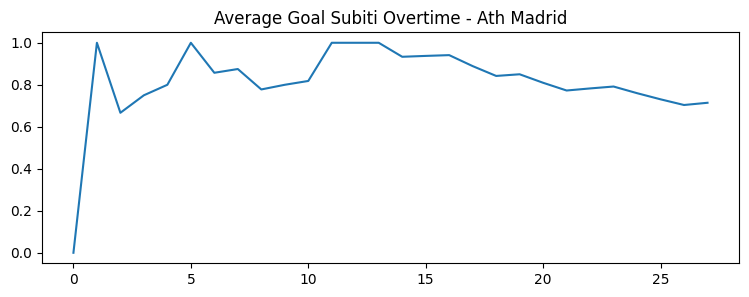

In [189]:
team = 'Ath Madrid'
matches_df[(matches_df.main_team==f"{team}")]\
        .sort_values('giornata')\
        .goal_subiti.expanding()\
        .mean().reset_index()\
        .goal_subiti.plot(kind='line', title=f"Average Goal Subiti Overtime - {team}",\
                          figsize=(9,3))

#### Just checking the actual matches

In [163]:
matches_df[(matches_df.main_team=='Real Madrid')&(matches_df.away_home=='away')]\
          .sort_values('giornata')\
        [['main_team','opponent_team','away_home','no_goal',
          'goal_fatti','goal_subiti','giornata','team_group']]

,main_team,opponent_team,away_home,no_goal,goal_fatti,goal_subiti,giornata,team_group
1304,Real Madrid,Almeria,away,False,2,1,1.0,2
1312,Real Madrid,Celta,away,False,4,1,2.0,1
1325,Real Madrid,Espanol,away,False,3,1,3.0,2
1357,Real Madrid,Ath Madrid,away,False,2,1,6.0,0
1372,Real Madrid,Getafe,away,True,1,0,8.0,2
1394,Real Madrid,Elche,away,True,3,0,10.0,2
1427,Real Madrid,Vallecano,away,False,2,3,13.0,1
1444,Real Madrid,Valladolid,away,True,2,0,15.0,2
1450,Real Madrid,Villarreal,away,False,1,2,16.0,0
1475,Real Madrid,Ath Bilbao,away,True,2,0,18.0,0
